In [128]:
#importing important libraries
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

color = sns.color_palette()

In [129]:
pd.set_option('display.max_columns',None) #Displaying all the columns of the dataset
data = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [130]:
data

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [131]:
data.shape

(2224, 11)

In [132]:
data.info() #We can see that our dataset contains no missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [133]:
data.head(25)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No
6,361148,Throttling service and unreasonable data caps,24-06-15,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,23-Jun-15,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No
8,318072,Comcast extended outages,06-01-15,06-Jan-15,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,28-Jun-15,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes


In [134]:
data.Date_month_year.unique()

array(['22-Apr-15', '04-Aug-15', '18-Apr-15', '05-Jul-15', '26-May-15',
       '06-Dec-15', '24-Jun-15', '23-Jun-15', '06-Jan-15', '28-Jun-15',
       '24-Apr-15', '05-Jun-15', '13-Jun-15', '30-Jun-15', '27-Jun-15',
       '16-Apr-15', '04-Nov-15', '06-Feb-15', '06-Jul-15', '06-Aug-15',
       '05-Feb-15', '22-Jun-15', '28-Apr-15', '24-May-15', '29-Apr-15',
       '19-May-15', '28-May-15', '06-May-15', '20-Jun-15', '29-Jun-15',
       '21-May-15', '18-Jun-15', '16-Jun-15', '05-Dec-15', '14-Apr-15',
       '15-Apr-15', '13-May-15', '27-May-15', '19-Jun-15', '25-Jun-15',
       '26-Jun-15', '17-Jun-15', '15-May-15', '04-Sep-15', '30-Apr-15',
       '15-Jun-15', '17-Apr-15', '04-Jan-15', '19-Apr-15', '04-Dec-15',
       '23-Apr-15', '05-Jan-15', '05-May-15', '05-Aug-15', '16-May-15',
       '22-May-15', '23-May-15', '25-May-15', '29-May-15', '30-May-15',
       '06-Mar-15', '06-Apr-15', '06-Oct-15', '04-Jul-15', '06-Nov-15',
       '27-Apr-15', '25-Apr-15', '18-May-15', '06-Jun-15', '04-O

In [135]:
data['Date_month_year'] = pd.to_datetime(data['Date_month_year'])

In [136]:
data

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [138]:

data['Year_Month_Date'] = pd.to_datetime(data['Date_month_year'], format="%Y%m%d") #Creating a new column having date in datetime format.

In [139]:
data.head(15)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Year_Month_Date
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-12-06
6,361148,Throttling service and unreasonable data caps,24-06-15,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,2015-06-24
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,2015-06-23,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,2015-06-23
8,318072,Comcast extended outages,06-01-15,2015-01-06,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,2015-01-06
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,2015-06-28,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,2015-06-28


In [140]:
data['Months'] = data['Year_Month_Date'].dt.month #Creating a new month column in dataset to display only months from date

In [141]:
data

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Year_Month_Date,Months
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22,4
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04,8
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05,7
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2015-02-04,2
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015-02-06,2
2221,331188,complaint about comcast,06-09-15,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,2015-09-06,9
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015-06-23,6


In [142]:
data.Months.unique()

array([ 4,  8,  7,  5, 12,  6,  1, 11,  2,  9,  3, 10])

In [143]:
data.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone', 'Year_Month_Date', 'Months'],
      dtype='object')

In [144]:
no_complaints_monthly = data.groupby('Months')['Customer Complaint'].count()
no_complaints_monthly = pd.DataFrame(no_complaints_monthly)
no_complaints_monthly = no_complaints_monthly.sort_values('Customer Complaint', ascending=0)
no_complaints_monthly

,Customer Complaint
Months,
6,1046
4,375
5,317
8,67
12,65
2,59
1,55
9,55
10,53


In [236]:
no_complaints_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 6 to 11
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Customer Complaint  12 non-null     int64
dtypes: int64(1)
memory usage: 192.0 bytes


In [146]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Year_Month_Date,Months
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22,4
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04,8
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05,7
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26,5


<AxesSubplot:xlabel='Months'>

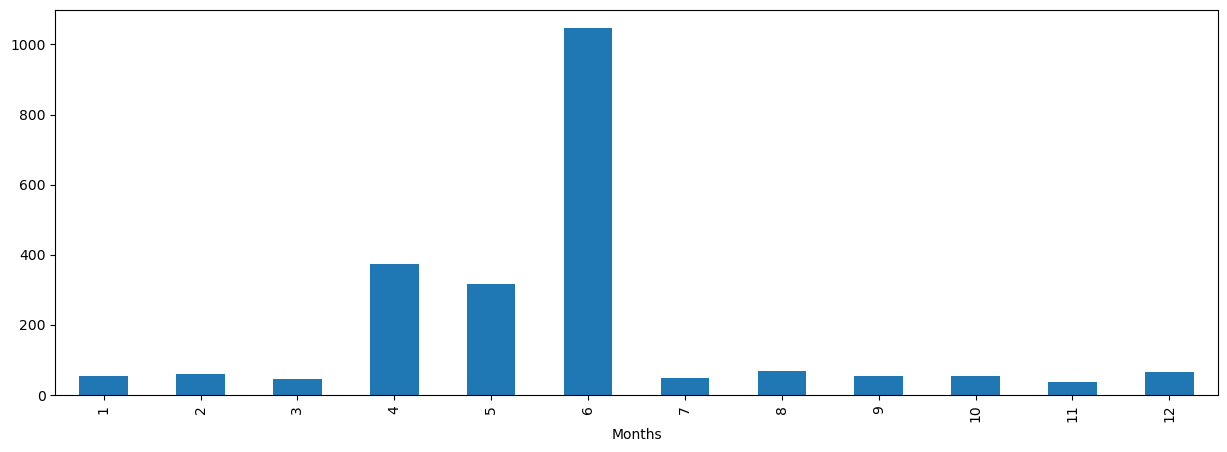

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15, 5)
data.groupby("Months")["Customer Complaint"].count().plot.bar()

In [148]:
data['Month_Names'] = data['Months'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [149]:
data.head(15)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Year_Month_Date,Months,Month_Names
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22,4,Apr
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04,8,Aug
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18,4,Apr
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05,7,Jul
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26,5,May
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-12-06,12,Dec
6,361148,Throttling service and unreasonable data caps,24-06-15,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,2015-06-24,6,Jun
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,2015-06-23,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,2015-06-23,6,Jun
8,318072,Comcast extended outages,06-01-15,2015-01-06,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,2015-01-06,1,Jan
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,2015-06-28,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,2015-06-28,6,Jun


<AxesSubplot:xlabel='Month_Names'>

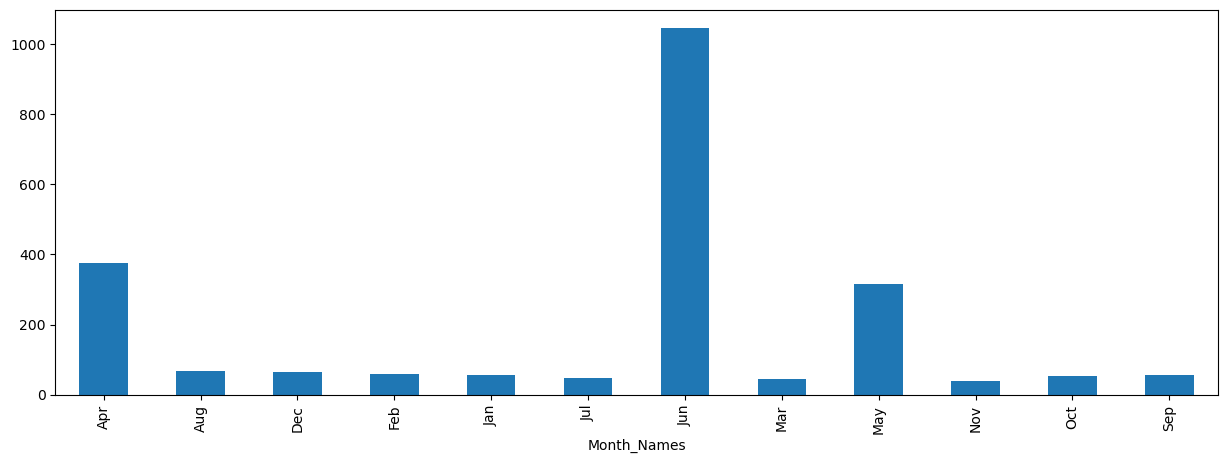

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15, 5)
data.groupby("Month_Names")["Customer Complaint"].count().plot.bar()
#Below figure represents a trend chart for the number of complaints at monthly levels.
#We can conclude that 'June' month received the most number of complaints.

<AxesSubplot:xlabel='Year_Month_Date'>

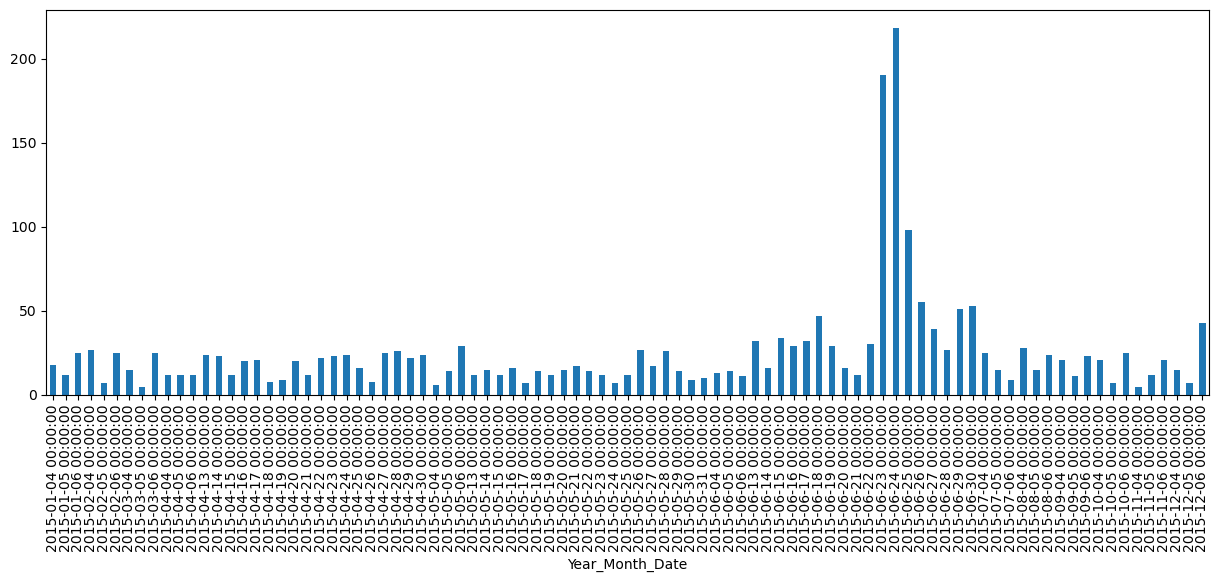

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15, 5)
data.groupby("Year_Month_Date")["Customer Complaint"].count().plot.bar()
#Below figure represents a trend chart for the number of complaints at daily levels.
#From the below graph we can see that most number of complaints were received on 24th June 2015.

In [152]:
complaints_frequency = data.groupby('Customer Complaint')['Ticket #'].count()
complaints_frequency = pd.DataFrame(complaints_frequency)
complaints_frequency = complaints_frequency.sort_values('Ticket #', ascending=0)
complaints_frequency
#Below table represents the frequency of complaint types.
#From the below table we can see that maximum complaints received is around internet domain related to issue of comcast.

,Ticket #
Customer Complaint,
Comcast,83
Comcast Internet,18
Comcast Data Cap,17
comcast,13
Comcast Billing,11
...,...
Comcast internet speeds extremely slow,1
Comcast internet speeds,1
Comcast internet service that I was NEVER able to use,1


In [153]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Year_Month_Date,Months,Month_Names
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22,4,Apr
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04,8,Aug
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18,4,Apr
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05,7,Jul
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26,5,May


In [168]:
#Function to categorize status as 'Open' if status column value is both 'Open' & 'pending'
#And assigning categorize as 'Closed' if status column value is both 'Closed' & 'Solved'
def FinalStatus(data):
    if data['Status'] == 'Open':
        return 'Open'
    elif data['Status'] == 'Pending':
        return 'Open'
    elif data['Status'] == 'Closed':
        return 'Closed'
    elif data['Status'] == 'Solved':
        return 'Closed'

In [169]:
data['FinalStatus'] = data.apply(lambda data:FinalStatus(data),axis=1)
#Creating a new column to use our above created function in dataset.

In [170]:
data.head(15)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Year_Month_Date,Months,Month_Names,FinalStatus
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22,4,Apr,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04,8,Aug,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18,4,Apr,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05,7,Jul,Open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26,5,May,Closed
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-12-06,12,Dec,Closed
6,361148,Throttling service and unreasonable data caps,24-06-15,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,2015-06-24,6,Jun,Open
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,2015-06-23,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,2015-06-23,6,Jun,Closed
8,318072,Comcast extended outages,06-01-15,2015-01-06,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,2015-01-06,1,Jan,Closed
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,2015-06-28,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,2015-06-28,6,Jun,Open


In [171]:
Final_status = data.groupby('FinalStatus')['Ticket #'].count()
Final_status = pd.DataFrame(Final_status)
Final_status = Final_status.sort_values('Ticket #', ascending=0)
Final_status

,Ticket #
FinalStatus,
Closed,1707
Open,517


In [261]:
#Removing unneccisary columns from our dataset
data.drop(['Date_month_year', 'Date'], axis=1, inplace=True)


In [174]:
state_wise_complaint = data.groupby('State')['Customer Complaint'].count()
state_wise_complaint = pd.DataFrame(state_wise_complaint)
state_wise_complaint = state_wise_complaint.sort_values('Customer Complaint', ascending=0)
state_wise_complaint
#From below dataframe we can conclude that state of 'Georgia' have maximum number of complaints.

,Customer Complaint
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143
Pennsylvania,130
Michigan,115
Washington,98
Colorado,80


In [184]:
state_wise_complaint_status = pd.crosstab(index=data["State"],columns=data["Status"])
state_wise_complaint_status

Status,Closed,Open,Pending,Solved
State,,,,
Alabama,8,4,5,9
Arizona,6,2,4,8
Arkansas,1,0,0,5
California,72,47,14,87
Colorado,23,12,10,35
Connecticut,3,2,1,6
Delaware,2,3,1,6
District Of Columbia,5,1,1,9
District of Columbia,0,0,0,1


<AxesSubplot:xlabel='State'>

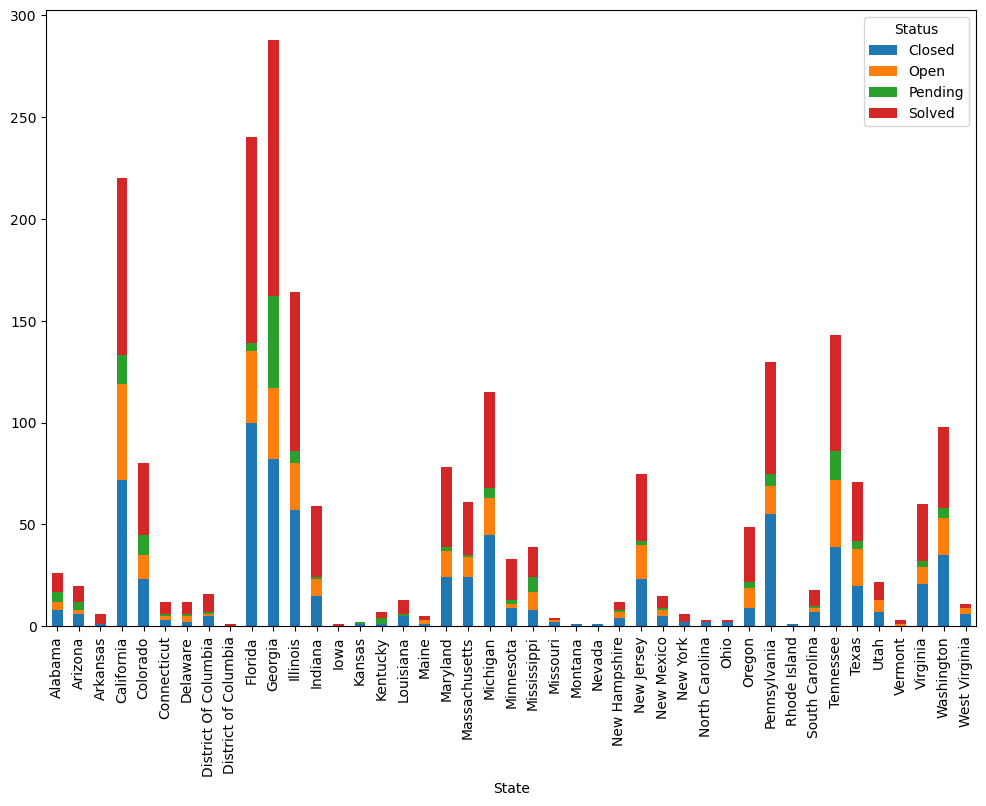

In [180]:
state_wise_complaint_status.plot(kind="bar",figsize=(12,8),stacked=True)
#Below stacked bar graph shows the state wise status of complaints without categorization into only 'Open' & 'closed'.

In [185]:
state_wise_complaint_status_final = pd.crosstab(index=data["State"],columns=data["FinalStatus"])
state_wise_complaint_status_final

FinalStatus,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


<AxesSubplot:xlabel='State'>

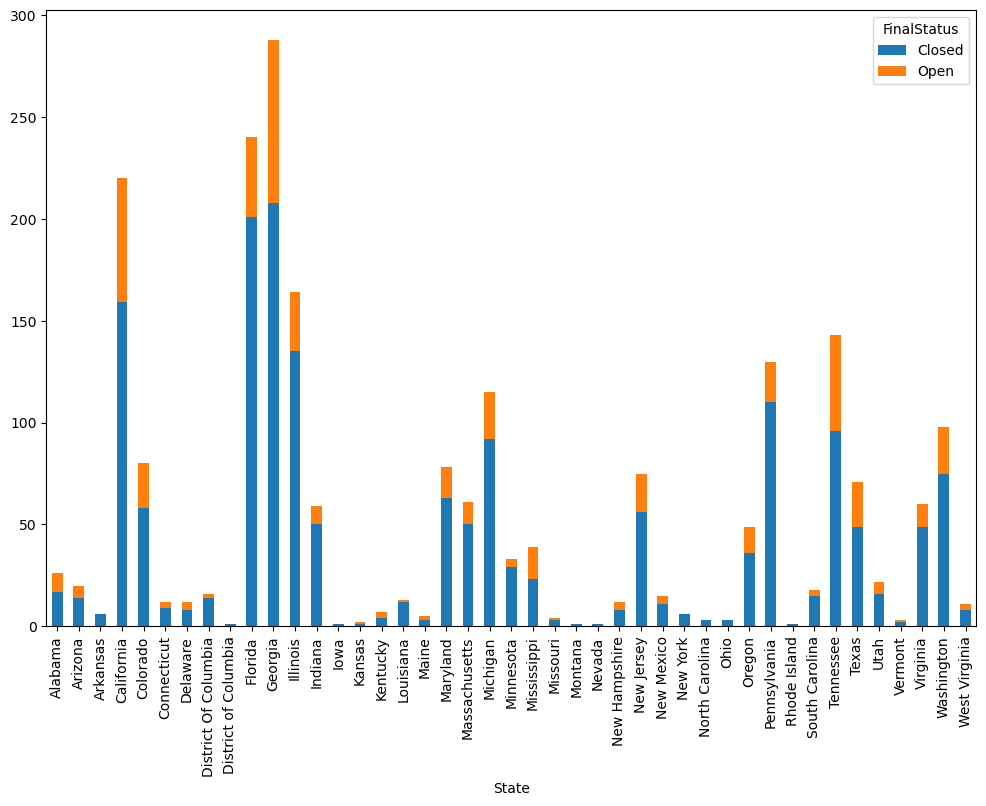

In [186]:
state_wise_complaint_status_final.plot(kind="bar",figsize=(12,8),stacked=True)
#Below stacked bar graph shows the state wise status of complaints as per the categorization from our new variable in 'Open' & 'Closed'.

In [ ]:
#State having highest percentage of unresolved complaints
state_wise_complaint = data.groupby('State')['FinalStatus'].count()
state_wise_complaint = pd.DataFrame(state_wise_complaint)
state_wise_complaint = state_wise_complaint.sort_values('Customer Complaint', ascending=0)
state_wise_complaint

In [214]:
percentage_unresolved_complaints = (state_wise_complaint_status_final['Open']/(state_wise_complaint_status_final['Closed']+state_wise_complaint_status_final['Open']))*100
#Calculating the percentage of unresolved or open complaints state wise.

In [217]:
percentage_unresolved_complaints = pd.DataFrame(percentage_unresolved_complaints)
percentage_unresolved_complaints

,0
State,
Alabama,34.615385
Arizona,30.000000
Arkansas,0.000000
California,27.727273
Colorado,27.500000
Connecticut,25.000000
Delaware,33.333333
District Of Columbia,12.500000
District of Columbia,0.000000


In [220]:
percentage_unresolved_complaints.rename( columns={0 :'%Unresolved_complaints'}, inplace=True )
#Renaming the column representing unresolved complaints percentage by states.

In [224]:
percentage_unresolved_complaints = percentage_unresolved_complaints.sort_values('%Unresolved_complaints', ascending=0)
#Displaying the unresolved complaints percentage in descending order.

In [225]:
percentage_unresolved_complaints

,%Unresolved_complaints
State,
Kansas,50.000000
Kentucky,42.857143
Mississippi,41.025641
Maine,40.000000
Alabama,34.615385
Vermont,33.333333
Delaware,33.333333
New Hampshire,33.333333
Tennessee,32.867133


In [226]:
percentage_unresolved_complaints.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, Kansas to New York
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   %Unresolved_complaints  43 non-null     float64
dtypes: float64(1)
memory usage: 688.0+ bytes


In [231]:
percentage_unresolved_complaints.rename( columns={'' :'States'}, inplace=True )

In [232]:
percentage_unresolved_complaints

,%Unresolved_complaints
State,
Kansas,50.000000
Kentucky,42.857143
Mississippi,41.025641
Maine,40.000000
Alabama,34.615385
Vermont,33.333333
Delaware,33.333333
New Hampshire,33.333333
Tennessee,32.867133


In [233]:
percentage_unresolved_complaints.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, Kansas to New York
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   %Unresolved_complaints  43 non-null     float64
dtypes: float64(1)
memory usage: 688.0+ bytes


In [239]:
percentage_unresolved_complaints = percentage_unresolved_complaints.reset_index(level=0) #Convering the index to column of the dataset.

In [240]:
percentage_unresolved_complaints
#From below dataframe we can conclude that state of 'Kansas' have most percentage of unresolved complaints.

,State,%Unresolved_complaints
0,Kansas,50.000000
1,Kentucky,42.857143
2,Mississippi,41.025641
3,Maine,40.000000
4,Alabama,34.615385
5,Vermont,33.333333
6,Delaware,33.333333
7,New Hampshire,33.333333
8,Tennessee,32.867133
9,Texas,30.985915


In [241]:
percentage_unresolved_complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   43 non-null     object 
 1   %Unresolved_complaints  43 non-null     float64
dtypes: float64(1), object(1)
memory usage: 816.0+ bytes


<AxesSubplot:xlabel='State'>

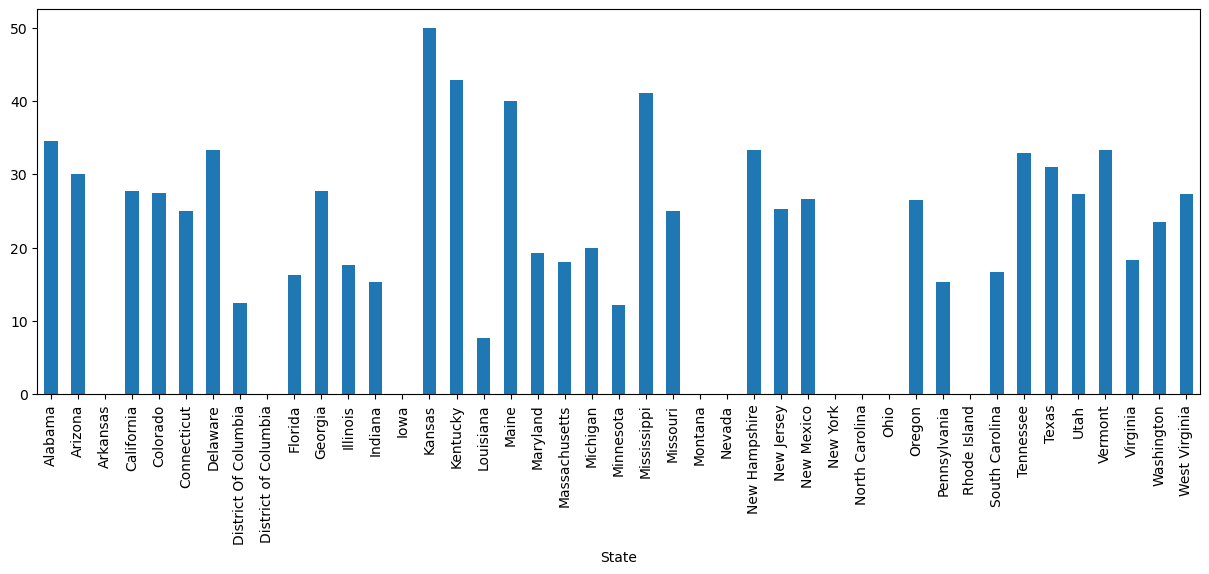

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15, 5)
percentage_unresolved_complaints.groupby("State")["%Unresolved_complaints"].mean().plot.bar()
#From below bar graph we can conclude that state of 'Kansas' have highest percentage of unresolved complaints.

In [251]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Year_Month_Date,Months,Month_Names,FinalStatus
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22,4,Apr,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04,8,Aug,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18,4,Apr,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05,7,Jul,Open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26,5,May,Closed


In [254]:
data.head(5)

,Ticket #,Customer Complaint,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Year_Month_Date,Months,Month_Names,FinalStatus
0,250635,Comcast Cable Internet Speeds,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22,4,Apr,Closed
1,223441,Payment disappear - service got disconnected,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04,8,Aug,Closed
2,242732,Speed and Service,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18,4,Apr,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05,7,Jul,Open
4,307175,Comcast not working and no service to boot,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26,5,May,Closed


In [255]:
complaint_received_via = data.groupby('Received Via')['Ticket #'].count()
complaint_received_via = pd.DataFrame(complaint_received_via)
complaint_received_via = complaint_received_via.sort_values('Ticket #', ascending=0)
complaint_received_via
#Below Dataframe shows total number of complaints received via 'Customer Care Call' & 'Internet'

,Ticket #
Received Via,
Customer Care Call,1119
Internet,1105


In [256]:
complaint_received_via_status_final = pd.crosstab(index=data["Received Via"],columns=data["FinalStatus"])
complaint_received_via_status_final
#Below Dataframe further breakdowns total number of complaints received via 'Customer Care Call' & 'Internet' as per their status.

FinalStatus,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [257]:
percentage_resolved_complaints = (complaint_received_via_status_final['Closed']/(complaint_received_via_status_final['Open']+complaint_received_via_status_final['Closed']))*100
#Calculating the percentage of resolved or closed complaints received via 'Customer Care Call' & 'Internet' 

In [258]:
percentage_resolved_complaints
#Below data shows that 77.211% of complaints received via 'Customer Care Call' has been resolved till date.
#And 76.289% of complaints received via 'Internet' has been resolved till date.

Received Via
Customer Care Call    77.211796
Internet              76.289593
dtype: float64